## Install and import missing libraries

In [1]:
pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 736.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 2.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17413 sha256=7012971005bce5a108a6c22ae03ea93d7b57a281c1fb9e257997b00eb1fe8243
  Stored in directory: /root/.cache/pip/wheels/60/b3/27/d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Unin

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=dd0cd5c2911cd19da828a9862220ccf5d381c98fe1399baf3e8915abf56c901d
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from googletrans import Translator
from langdetect import detect
import tensorflow as tf
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.lt.examples import sentences
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
pd.set_option("display.max_colwidth", 255)

In [6]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>"))

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Data preparation

In [8]:
# uploading data
df_1 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_1.csv", index_col=0, encoding='utf-8')
df_2 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_2.csv", index_col=0, encoding='utf-8')
df_3 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_3.csv", index_col=0,encoding='utf-8')
df_4 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_4.csv", index_col=0,encoding='utf-8')
df_5 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_5.csv", index_col=0,encoding='utf-8')
df_6 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_6.csv", index_col=0,encoding='utf-8')
df_7 = pd.read_csv("/content/drive/My Drive/data/KAM_tema_3000_7.csv", index_col=0,encoding='utf-8')

In [9]:
df_1.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
39918736,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]",Padėka.,"Liepos 7 d. Klaipėdoje esančiame konteinerių terminale „Klaipėdos Smeltė” Jungtinių Amerikos Valstijų (JAV) kariuomenės 8-ojo kavalerijos pulko 2-ojo bataliono vadui plk. ltn. Stevenui Jackowski, vyriausiajam puskarininkiui srž. mjr. Jesusui Penai ir ...",2021-07-09 00:00:00


In [10]:
df_2.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
45643172,337489,KAM tema: Įsigijimai ir biudžetas [i],Lietuva turi naują „žvaigždę“,"Kai jau atrodo nebėra kuo mūsų nustebinti ir visus absurdo šovinius valdžios ministrai jau iššaudė, atsiranda nauja “žvaigždė”. Pagal I. Valinskienę - “likimo mums duota”.<br /> Šios savaitės, geriausio kas galėjo nutikti Lietuvai ministro estafetę, i...",2022-07-27 23:51:07


In [11]:
df_3.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
49188700,337490,KAM tema: Saugumo ir gynybos politika [i],JAV žvalgyba: Putinas pasiryžęs tęsti karą Ukrainoje – galbūt ne vienerius metus,"Rusijos režimo lyderis Vladimiras Putinas skaičiuoja, kad laikas yra jo pusėje ir ketina tęsti karą, galbūt net daugelį metų, sako JAV žvalgai. Vis dėlto, anot jų, nėra tikėtina, kad rusams pavyks pasiekti didesnių teritorinių laimėjimų.<br /> Rusija ...",2023-03-08 20:40:00


In [12]:
df_4.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
35805135,337491,KAM tema: Kibernetinis saugumas [i],"Internetiniai sukčiai pamėgo prisidengti Lietuvos paštu, VMI ir „Sodra“: per pusmetį pavogė 2,2 mln. eurų","Internetinių sukčių schemos techniškai vis sudėtingėja, o būdų išvilioti pinigus sugalvojama vis daugiau. Pastaruoju metu internetiniai sukčiai gyventojus apgauti bandė apsimetę Lietuvos paštu, Valstybine mokesčių inspekcija, bankais. Beje, bankų klie...",2020-10-08 10:59:00


In [13]:
df_5.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
43588103,337492,KAM tema: Pilietiškumas ir atsparumas propagandai [i],Kovo 11-oji: prisiminkime istoriją,"Lietuvos nepriklausomybės atkūrimo diena minima kovo 11 d., pažymint 1990 m. tą dieną Aukščiausiosios Tarybos-Atkuriamojo Seimo pasirašytą Lietuvos Nepriklausomybės Atkūrimo Aktą.<br /> 1940 m. birželio 15 d. Sovietų Sąjunga okupavo nepriklausomą Liet...",2022-03-10 00:00:00


In [14]:
df_6.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
23844501,337493,"KAM tema: Incidentai, nelaimės, kriminalai [i]",Kelmės rajone rasta minosvaidžio mina,"Vakar, lapkričio 20 d., Kelmės rajone buvo rasta minosvaidžio mina.<br /> Kaip pranešė policija, Kukečių seniūnijoje atliekant kasimo darbus rastas galimai sprogmuo. 10.09 val. įvestas planas „Skydas“. Atvykę Juozo Vitkaus inžinerijos bataliono sprogm...",2018-11-21 09:49:00


In [15]:
df_7.sample(1)

,keyword_id,keyword_name,article_title,article_body,pubdatetime
article_id,,,,,
38740967,484549,KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i],Susisiekimo ministerija pateikė atsaką dėl dingusių apsaugos priemonių: vienetais niekas neskaičiavo,"Susisiekimo ministerijos kancleris Ramūnas Dilba pateikė daugiau informacijos dėl dingusių apsaugos nuo koronaviruso priemonių. Anot jo, didžiąją dalį priemonių paskirstė Lietuvos paštas savo resursais. Tuo metu pačios apsaugos priemonės buvo gautos i...",2021-04-22 13:59:00


In [16]:
# Putting all the data into one dataframe and then do a copy
full_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7]).reset_index()

In [17]:
full_df_copy = full_df

In [18]:
full_df_copy.sample(5)

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime
7905,48717460,337490,KAM tema: Saugumo ir gynybos politika [i],[Žinios trumpai] Beveik metus „Donbaso šiukšlynus“ šturmuojanti Rusija rado naują tikslą (Video),"Rusijos karas prieš Ukrainą tebėra pagrindinė propagandinių laidų Rusijoje tema, tačiau Kremlius atkakliai bando įpiršti nuomonę, kad Rusijos kariuomenė kariauja su visu NATO bloku.<br /> Asociatyvi nuotr.<br /> ©General Staff of the Armed Forces of U...",2023-02-07 21:40:00
12767,47464590,337492,KAM tema: Pilietiškumas ir atsparumas propagandai [i],"Seimas apsisprendė dėl kitų metų biudžeto: daugiau pinigų kompensacijoms, didės pensijos, dalies atlyginimai","Seimas antradienį priėmė kitų metų valstybės biudžeto projektą. Jame daugiausiai dėmesio skiriama infliacijos pasekmių mažinimui, energetikos kompensacijoms, valstybės saugumui ir investicijoms į Lietuvos ateitį, numatytas 4,9 proc. BVP deficitas. Die...",2022-11-22 17:37:58
6053,49244330,337490,KAM tema: Saugumo ir gynybos politika [i],"Kremlių išgąsdino žinia, kas atvyksta į Ukrainą: skubiai kreipiasi pagalbos į Kiniją","Putinas bando sutrukdyti Ukrainos Rytų sąjungininko susitarimą.<br /> ©Міністерство оборони України (Atvira licencija) | www.facebook.com<br /> Pakistanas planuoja perduoti Ukrainai didelę partiją tankų, o tai labai nepatinka Kremliui.<br /> Sprendžia...",2023-03-12 21:00:01
15010,49187955,337493,"KAM tema: Incidentai, nelaimės, kriminalai [i]","Po avarijos, per kurią sužaloti 8 kariškiai, kilo klausimų dėl jų saugumo: kariuomenė tikina – viskas pagal taisykles","Praėjusį antradienį Lietuvą apskriejo žinia – Kazlų Rūdos rajone į eismo įvykį pateko kariškių transportas. Kaip paaiškėjo, jis atsitrenkė į priekyje važiavusį neuniformuoto policijos pareigūno automobilį. Per šį incidentą vienas iš kariškių automobil...",2023-03-08 19:24:00
9310,45341660,337491,KAM tema: Kibernetinis saugumas [i],Po „Švaros brolių“ duomenų nutekėjimo – specialistų įspėjimas: Lietuvai kilo neeilinis pavojus,"Informacinio karo amžiuje asmens duomenys gali tapti esminiu ginklu. Specialistai pastebi, kad prasidėjus karui Ukrainoje į Lietuvą skrieja vis daugiau programišių strėlių. Nutekėję „Švaros brolių“ klientų duomenys verčia sunerimti. Netekę svarbių duo...",2022-07-06 19:15:00


In [19]:
full_df_copy

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime
0,49261550,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]","Rupšys su Kroatijos kolega aptarė karinį bendradarbiavimą, Ukrainos paramos planus","Lietuvos kariuomenės vadas Valdemaras Rupšys su Lietuvoje pirmadienį viešinčiu Kroatijos kolega Robertu Hraniu aptarė dvišalį karinį bendradarbiavimą, bendrą dalyvavimą tarptautinėse pratybose, planus dėl tolimesnės paramos Ukrainai, pranešė kariuomen...",2023-03-13 20:48:00
1,49260598,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]",Rukloje susitiko Lietuvos ir Kroatijos kariuomenenių vadai,"Lietuvoje su oficialiu vizitu lankėsi Kroatijos Respublikos kariuomenės vadas admirolas Robert Hranj, kuris susitikime su Lietuvos kariuomenės vadu gen. ltn. Valdemaru Rupšiu aptarė dvišalį karinį bendradarbiavimą, bendrą dalyvavimą tarptautinėse prat...",2023-03-13 19:25:36
2,49258275,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]",Jašiūnų ir Šalčininkų seniūnijų teritorijose vyks karinio rengimo pratybos,Lietuvos kariuomenės Krašto apsaugos savanorių pajėgų Didžiosios Kovos apygardos 8-oji rinktinė informuoja apie kovo mėnesį Šalčininkų rajono savivaldybės teritorijoje vyksiančias pratybas.<br /> Kovo 18–19 d.Jašiūnų ir Šalčininkų seniūnijų teritorijo...,2023-03-13 15:29:00
3,49256367,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]",Po pratybų kariams savanoriams siūloma suteikti 2 dienas neapmokamų atostogų,Po planinių savaitgalinių pratybų siūloma suteikti galimybę kariams savanoriams gauti dvi dienas neapmokamų atostogų.<br /> Į atsargą išlydėti tarnybą baigę Sausumos pajėgų štabo Ryšių kuopos šauktiniai<br /> Tai siūlančias Krašto apsaugos sistemos or...,2023-03-13 15:24:27
4,49246312,337488,"KAM tema: Kariuomenės stiprinimas, pratybos [i]",Lietuvos kariuomenė planuoja įsigyti dešimtis tankų: interviu su generolu leitenantu Valdemaru Rupšiu,Lietuvos kariuomenės planuoja įsigyti dešimtis tankų. Jie numatyti nacionalinės divizijos kūrimo plane. Divizijos kūrimas neseniai buvo aptartas Valstybės gynimo taryboje. Šiuos planus 15min studijoje pristatė kariuomenės vadas generolas leitenantas V...,2023-03-13 06:39:00
...,...,...,...,...,...,...
19408,37086593,484549,KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i],"Judėjimo kontrolė: policija stabdys bet kur ir bet kada, už pažeidimus iš karto baus","Vyriausybei pratęsus judėjimo kontrolę tarp savivaldybių, šalies policija tai vykdys mobiliais postais – vairuotojai gali būti stabdomi bet kur ir bet kada.<br />„Policija gali atsirasti bet kur ir bet kuriuo metu. Be reikalo geriau nevažiuoti. Tolera...",2021-01-04 12:25:00
19409,37086158,484549,KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i],"Kauno policija apibendrino: blokpostuose apgręžta tūkstančiai mašinų, nubausta šimtai pažeidėjų","Per tris savaitgalius patikros postuose Kauno apskrityje pareigūnai iš viso sustabdė beveik 364 tūkst. transporto priemonių, daugiau nei 12,5 tūkst. teko apsisukti.<br />Kauno apskrities policijos pareigūnai, kaip ir kolegos visoje šalyje, tris savait...",2021-01-04 11:52:00
19410,37099479,484549,KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i],Plaučių transplantacija – išskirtinė ir labai laukiama operacija,"Lietuvoje<br /> Sveikata<br /> Plaučių transplantacija – išskirtinė ir labai laukiama operacija<br /> 2020/12/31<br /> NG<br /> Lietuvoje šiuo metu aštuoni žmonės laukia retos ir sudėtingos plaučių persodinimo operacijos. Trys iš šių žmonių yra, taip ...",2020-12-31 08:01:00
19411,37376517,484549,KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i],Stop kadras,"<p>1920</p><p>Pirmieji</p><p>Režisieriaus Juozo Vaičkaus 1920 metais gruodžio 19 dieną Dramos vaidykloje pastatyta Hermanno Sudermanno pjesė „Joninės"" oficialiai laikoma Lietuvos profesionaliojo teatro gimtadieniu. Aktoriai pjesę repetavo Juozo Vaička...",2020-12-31 00:00:00


In [20]:
full_df_copy["keyword_name"].value_counts()

KAM tema: Kariuomenės stiprinimas, pratybos [i]                                    3000
KAM tema: Įsigijimai ir biudžetas [i]                                              3000
KAM tema: Saugumo ir gynybos politika [i]                                          3000
KAM tema: Kibernetinis saugumas [i]                                                3000
KAM tema: Pilietiškumas ir atsparumas propagandai [i]                              3000
KAM tema: Incidentai, nelaimės, kriminalai [i]                                     3000
KAM tema: Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams [i]    1413
Name: keyword_name, dtype: int64

In [21]:
full_df_copy["keyword_name"] = (
    full_df_copy["keyword_name"].str.replace("KAM tema:", "").str.replace("\[i\]", "")
)

<ipython-input-21-12eb53a24862>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  full_df_copy["keyword_name"].str.replace("KAM tema:", "").str.replace("\[i\]", "")


In [22]:
category = (
    full_df_copy[["keyword_name", "keyword_id"]]
    .drop_duplicates()
    .sort_values("keyword_id")
)
category

,keyword_name,keyword_id
0,"Kariuomenės stiprinimas, pratybos",337488
3000,Įsigijimai ir biudžetas,337489
6000,Saugumo ir gynybos politika,337490
9000,Kibernetinis saugumas,337491
12000,Pilietiškumas ir atsparumas propagandai,337492
15000,"Incidentai, nelaimės, kriminalai",337493
18000,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,484549


In [23]:
# Define the custom colors
colors = ["#F5F2B8", "#F9DAD0", "#C5DCA0", "#B279A7", "#7E7F9A", "#6665DD",  "#7CA5B8"]

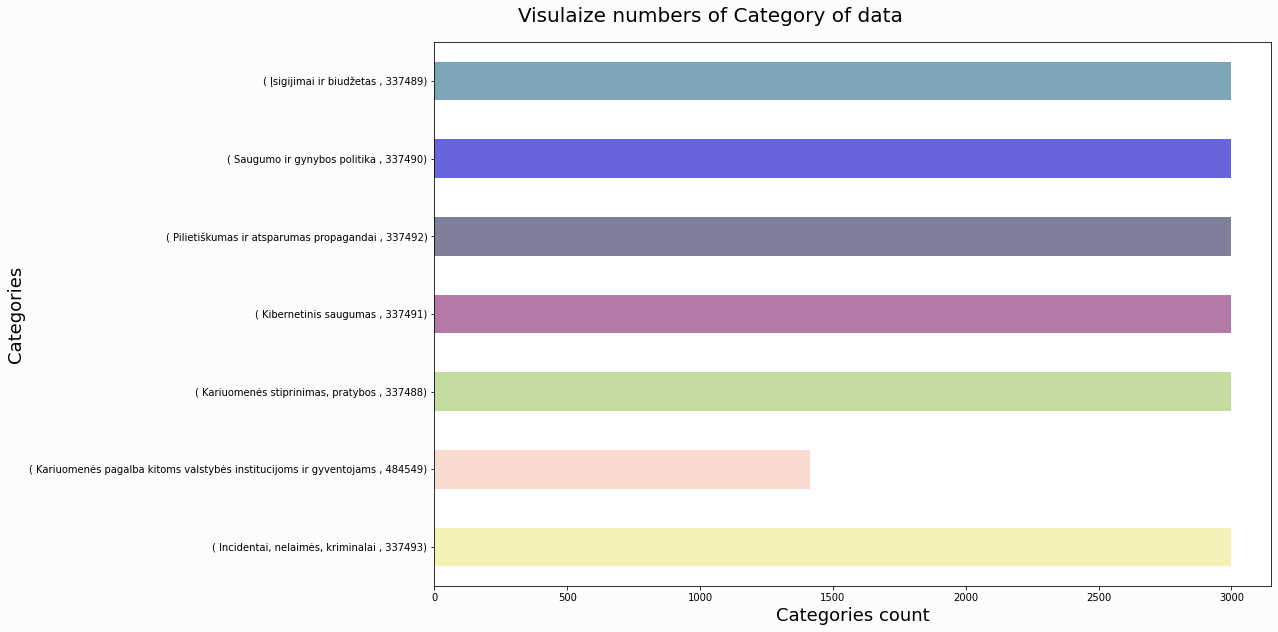

In [24]:
plt.figure(figsize=(15, 10), facecolor=(0.99, 0.99, 0.99))
full_df_copy.groupby("keyword_name").keyword_id.value_counts().plot(
    kind="barh", color=colors
)
plt.xlabel("Categories count", fontsize=18)
plt.ylabel("Categories", fontsize=18)
plt.title("Visulaize numbers of Category of data", pad=20, fontsize=20).set_position(
    [0.33, 1]
)
plt.savefig("Not_cleaned_data.png", facecolor=(0.99, 0.99, 0.99))
plt.show()

## Cleaning and normalising data

In [25]:
# Lowercase the text for better accuracy
full_df_copy["article_title"] = full_df_copy["article_title"].str.lower()
full_df_copy["article_body"] = full_df_copy["article_body"].str.lower()

In [26]:
# Remove html, link and file elements from given text
def remove_html_tags(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\b\w+\.(?:jpg|jpeg|png|gif)\b', '', text)
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply the remove html, link, file elements to the article_title and article_body columns 
full_df_copy["article_body"] = full_df_copy["article_body"].apply(
    lambda x: remove_html_tags(x)
)
full_df_copy["article_title"] = full_df_copy["article_title"].apply(
    lambda x: remove_html_tags(x)
)

<ipython-input-26-c4d4249c46e9>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [27]:
# Remove special characters from text
def special_char(text):
    reviews = ""
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + " "
    return reviews

# Apply the special remove to the article_body columns  
full_df_copy["article_body"] = full_df_copy["article_body"].apply(special_char)

In [28]:
# Simple language detect in text
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"
    
# Apply the language detection to the article_title and article_body columns   
full_df_copy["title_lang"] = full_df_copy["article_title"].apply(detect_lang)
full_df_copy["body_lang"] = full_df_copy["article_body"].str.slice(stop=255).apply(detect_lang)


In [29]:
#  Cheking unique language values to see what languages were detected in title
full_df_copy["title_lang"].unique()

array(['lt', 'sv', 'pl', 'lv', 'sl', 'de', 'af', 'it', 'en', 'ru', 'cy',
       'no', 'tl', 'id', 'fi', 'so', 'et', 'es', 'tr', 'pt', 'hr', 'sq',
       'fr', 'sw', 'uk', 'sk', 'nl', 'cs'], dtype=object)

In [30]:
#  Cheking unique language values to see what languages were detected in body
full_df_copy["body_lang"].unique()

array(['lt', 'pl', 'unknown', 'en', 'ru', 'uk', 'lv'], dtype=object)

In [31]:
# Personally, I know that certain detected languages are not in the data, so I check each one individually to know whether to keep it or not
full_df_copy[full_df_copy["title_lang"] == "pt"]

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime,title_lang,body_lang
3535,44284853,337489,Įsigijimai ir biudžetas,2:0 emanuelio naudai,2017 m užsitikrinęs prancūzijos prezidento postą šiais metais emanuelis makronas vėl triumfavo kovoje prieš marine le pen europa gi vieningai atsiduso ekstremistinių idėjų vedina konkurentė dar penkerius metus nepasieks šalies valdymo vairo proru...,2022-04-28 00:00:00,pt,lt
4360,38602305,337489,Įsigijimai ir biudžetas,dosnumas,dosnumas jav dovanoja lietuvos kariuomenei prieštankinių granatsvaidžių m72law paramos vertė 10 mln dolerių kam lt nuotr,2021-04-14 00:00:00,pt,lt
9603,43950328,337491,Kibernetinis saugumas,nesuranda vadovo,vakar ketverių metų kadenciją baigė dabartinis nacionalinio kibernetinio saugumo centro nksc vadovas r rainys tačiau krašto apsaugos ministerijai nuo praėjusio rudens nepavyksta rasti jį galinčio pakeisti specialisto artimiausiu metu planuojama tr...,2022-04-05 00:00:00,pt,lt
15383,44284853,337493,"Incidentai, nelaimės, kriminalai",2:0 emanuelio naudai,2017 m užsitikrinęs prancūzijos prezidento postą šiais metais emanuelis makronas vėl triumfavo kovoje prieš marine le pen europa gi vieningai atsiduso ekstremistinių idėjų vedina konkurentė dar penkerius metus nepasieks šalies valdymo vairo proru...,2022-04-28 00:00:00,pt,lt
17351,23485878,337493,"Incidentai, nelaimės, kriminalai",gabeno donoro organus,naktį į sekmadienį karinių oro pajėgų sraigtasparnis mi 8 budintis kaune buvo pasitelktas pargabenti donoro organus iš rygos į kauno klinikas,2018-10-30 00:00:00,pt,lt
17457,23182902,337493,"Incidentai, nelaimės, kriminalai",po incidento - nauju maršrutu,praeitą savaitę pakeliui į klaipėdą incidentą patyręs keltas regina seaways išplaukė nauju maršrutu jau nebe į kylį vokietijoje kaip iki tol bet į karlshamną švedijoje nors veikia tik vienas laivo variklis kompanijos atstovų tvirtinimu tai nė...,2018-10-11 00:00:00,pt,lt
18311,43701772,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,didina maisto rezervą,seimas pritarė žemės ūkio ministerijos žūm siūlymui keisti valstybės maisto produktų rezervo tvarką kad ji atitiktų šių dienų poreikius iki šiol valstybės rezervui žemės ūkio produktai bei maisto prekės valstybės lėšomis perkami viešųjų pirkimų įs...,2022-03-18 00:00:00,pt,lt
18423,42259869,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,donoras,donoras vakar lietuvos kariuomenės karinių oro pajėgų sraigtasparnis pakilo iš kauno kad nuskraidintų medikų komandą ir donorinius organus iš latvijos valmieros ligoninės į santaros klinikas vilniuje,2021-12-11 00:00:00,pt,lt


In [32]:
full_df_copy[(full_df_copy["title_lang"] == "lt") & (full_df_copy["body_lang"] == "en")]

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime,title_lang,body_lang
6748,49030543,337490,Saugumo ir gynybos politika,poll: nausėda is most popular politician,president gitanas nausėda is the most popular politician in lithuania a poll has revealed gitanas nausėda the poll commissioned by the news website lrytas was carried out by the pollster vilmorus on 9 18 february which interviewed 1 000 adult resid...,2023-02-27 16:45:50,lt,en
7106,48954980,337490,Saugumo ir gynybos politika,ukraine’s zelensky plans to attend nato vilnius summit,president of ukraine volodymyr zelensky is planning to arrive to vilnius for the nato summit ambassador of ukraine to lithuania petro beshta told the bns news agency volodymyras zelenskis when asked whether zelensky intended to come to the alliance ...,2023-02-22 12:18:37,lt,en
7907,48717088,337490,Saugumo ir gynybos politika,ukrainai dronus tiekusios jav įmonės gamykloje latvijoje kilo gaisras,gaisras latvijoje afp scanpix nuotr firefighters extinguish a fire at a drone factory run by us firm edge autonomy in marupe on the outskirts of latvia s capital riga on february 7 2023 a fire broke out on february 7 at a us drone factory in l...,2023-02-07 21:06:00,lt,en
8694,48479767,337490,Saugumo ir gynybos politika,nausėda: decisions on tanks for ukraine soon,poland is absolutely determined to deliver tanks to ukraine president gitanas nausėda said after meeting his polish counterpart andrzej duda in warsaw on monday gitanas nausėda the lithuanian head of state is confident that the necessary decisions...,2023-01-24 11:01:39,lt,en
11953,22705718,337491,Kibernetinis saugumas,kibernetinio saugumo konferencija security day'18: „jūsų duomenys el. erdvėje - kas juos apsaugos ir kaip?“,09 30 10 20 key note adress by gregory f treverton cyber threats and cyber defenses a strategic view10 25 11 50 panel discussion eprivacy who will win 12 50 14 05 panel discussion how lithuania is prepared to ensure eprivacy,2018-09-12 18:00:00,lt,en


In [33]:
full_df_copy[(full_df_copy["title_lang"] == "en") & (full_df_copy["body_lang"] == "lt")]

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime,title_lang,body_lang
4690,33227652,337489,Įsigijimai ir biudžetas,citata iš www.ve.lt.,tai tikrai viena iš rimtesnių gynybai skirtų priemonių tik ar pakaktų gerai paruoštų specialistų rezervo jeigu neduok dieve prireiktų naudoti pagal paskirtį taip straipsnį lietuvos kariuomenė papildė prieštankinių raketų sistemų javelin at...,2020-08-06 00:00:00,en,lt
10814,32125466,337491,Kibernetinis saugumas,„the digital finance outreach – lithuania“ seminare – europos skaitmeninių finansų ateities perspektyvos,2020 05 18 europos komisija rengdama naująją europos sąjungos es skaitmeninių finansų strategiją vykdo išskirtinę iniciatyvą fintech renginių seriją valstybėse narėse pagal tarptautinį fintech indeksą lietuva es pirmaujanti valstybė galinti ...,2020-05-18 17:03:00,en,lt
11959,22640069,337491,Kibernetinis saugumas,antis,įsilaužta į baltijos šalių naujienas rašančio mėnesinio laikraščio portalą the baltic times pasklebta melaginga naujiena apie lietuvoje sudužusį nenustatytą nato karinį objektą,2018-09-08 00:00:00,en,lt


In [34]:
# removing 'ru', 'et', 'uk', 'pl', and 'en'
# leaving 'sl', 'lv', 'de', 'af', 'cy', 'fi','tl', 'id', 'et', 'pt', 'ca', 'ro', 'sv', 'sw', 'tr', 'unknown', 'hr', 'so', 'da', 'sq', 'hu', 'es', 'sk', 'fr', 'no', 'uk', 'nl','bg', 'mk', 'cs'

def clean_dataframe(df):
    df.drop(df[df['body_lang'] == "ru"].index, inplace=True)
    df.drop(df[df['body_lang'] == "et"].index, inplace=True)
    df.drop(df[df['body_lang'] == "uk"].index, inplace=True)
    df.drop(df[df['body_lang'] == "pl"].index, inplace=True)
    df.drop(df[df['body_lang'] == "en"].index, inplace=True)

clean_dataframe(full_df_copy)

In [35]:
# Drop the temporary language detection columns
full_df_copy.drop(["title_lang", "body_lang"], axis=1, inplace=True)

In [36]:
# Create a function to translate text using googletrans
def translate_text(text, dest_lang):
    translator = Translator()
    translator.raise_Exception = True
    translated = translator.translate(text, dest=dest_lang)

    return translated.text


# Creating temporary dataframe for translation from the missing keyword data
df_subset = full_df_copy[full_df_copy['keyword_id'] == 484549]



# Translate the article_title and article_body columns to English
df_subset['article_title'] = df_subset['article_title'].apply(lambda x: translate_text(x, 'en'))
df_subset['article_body'] = df_subset['article_body'].str.slice(stop=255).apply(lambda x: translate_text(x, 'en'))

# Translate the article_title_en and article_body_en columns back to Lithuanian
df_subset['article_title'] = df_subset['article_title'].apply(lambda x: translate_text(x, 'lt'))
df_subset['article_body'] = df_subset['article_body'].apply(lambda x: translate_text(x, 'lt'))



<ipython-input-36-ba32668c6675>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['article_title'] = df_subset['article_title'].apply(lambda x: translate_text(x, 'en'))


Exception: ignored

In [37]:
df_subset

,article_id,keyword_id,keyword_name,article_title,article_body,pubdatetime
18000,49216592,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,"At night, a military helicopter went to the hospital in Vilnius: conducted a special mission",ketvirtadienio naktį vilniuje nusileido karinių oro pajėgų sraigtasparnis su donorinėmis kepenimis iš užsienio kartu grįžo ir vilniaus universiteto ligoninės santaros klinikų pilvo chirurgų komanda kuri dalyvavo donorinio organo eksplantacijos proce...,2023-03-10 09:44:00
18001,49218295,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,"At night, a military helicopter flew to Vilnius to live a life -saving cargo",kariuomenė praneša kad iš nacionalinio transplantacijos biuro buvo gautas pagalbos prašymas pergabenti donoro organą atsižvelgus į prašymą kovo 9 d apie 17 val iš kaune esančio 2 ojo paieškos ir gelbėjimo posto kartu su medikų komanda pakilo bu...,2023-03-10 08:44:00
18002,49212719,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,By using the Air Force helicopter tonight the donor organ,kovo 9 d naktį iš nacionalinio transplantacijos biuro buvo gautas pagalbos prašymas pergabenti donoro organą rašoma lietuvos kariuomenės pranešime tai pirmas kartas šiais metais kai iš užsienio atgabenami donoriniai organai skelbia nacionalinis...,2023-03-10 07:16:00
18003,49212746,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,The army helicopter from Kaunas to Vilnius took the donor organ,vilnius kovo 10 d bns penktadienį iš kauno į vilnių buvo pergabentas donoro organas pranešė lietuvos kariuomenė kariuomenė ketvirtadienį iš nacionalinio transplantacijos biuro gavo prašymą padėti pergabenti donorinį organą apie 17 val iš kaun...,2023-03-10 07:16:00
18004,49154646,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,War Volunteer Jovita Juškaitienė: Today Military Knowledge is also useful in life,neseniai lietuvos kariuomenės krašto apsaugos savanorių pajėgų kasp dariaus ir girėno apygardos 2 oji rinktinė paminėjo 32 ąsias karinio vieneto įkūrimo metines šiemet šakių 205 os pėstininkų kuopos karė savanorė jovita juškaitienė išrinkta geriaus...,2023-03-07 00:00:00
...,...,...,...,...,...,...
19408,37086593,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,"Movement Control: The police will stop anywhere, anytime, for violations immediately punish",vyriausybei pratęsus judėjimo kontrolę tarp savivaldybių šalies policija tai vykdys mobiliais postais vairuotojai gali būti stabdomi bet kur ir bet kada policija gali atsirasti bet kur ir bet kuriuo metu be reikalo geriau nevažiuoti tolerancijos...,2021-01-04 12:25:00
19409,37086158,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,"Kaunas police summarized: thousands of machines were turned in blockfrakes, hundreds of offenders were punished",per tris savaitgalius patikros postuose kauno apskrityje pareigūnai iš viso sustabdė beveik 364 tūkst transporto priemonių daugiau nei 12 5 tūkst teko apsisukti kauno apskrities policijos pareigūnai kaip ir kolegos visoje šalyje tris savaitgalius...,2021-01-04 11:52:00
19410,37099479,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,Pulmonary transplant - exclusive and highly anticipated surgery,lietuvoje sveikata plaučių transplantacija išskirtinė ir labai laukiama operacija 2020 12 31 ng lietuvoje šiuo metu aštuoni žmonės laukia retos ir sudėtingos plaučių persodinimo operacijos trys iš šių žmonių yra taip vadinami skubūs atvejai ku...,2020-12-31 08:01:00
19411,37376517,484549,Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams,Stop shot,1920pirmiejirežisieriaus juozo vaičkaus 1920 metais gruodžio 19 dieną dramos vaidykloje pastatyta hermanno sudermanno pjesė joninės oficialiai laikoma lietuvos profesionaliojo teatro gimtadieniu aktoriai pjesę repetavo juozo vaičkaus bute kęstučio ...,2020-12-31 00:00:00


In [38]:
# concat the translated columns  to the original dataframe
full_df_copy = pd.concat([full_df_copy, df_subset]).reset_index()

In [39]:
with open("stops_lt.txt", "r") as file:
    stopwords = [word.strip() for word in file.readlines()]

politics related words:


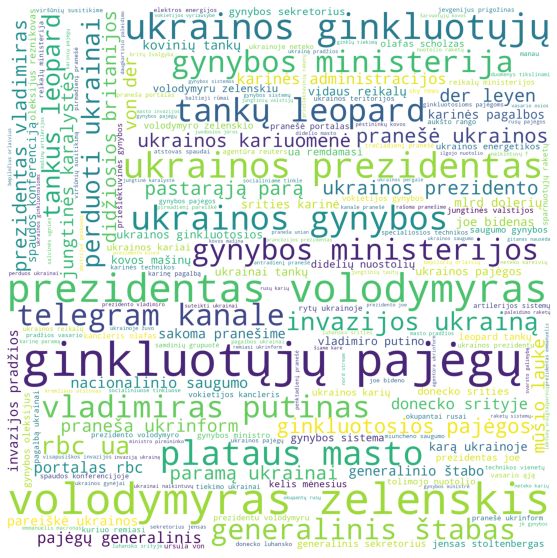

training related words:


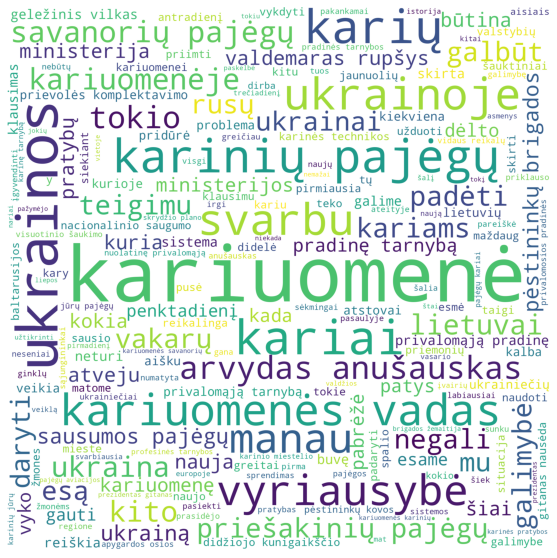

budget related words:


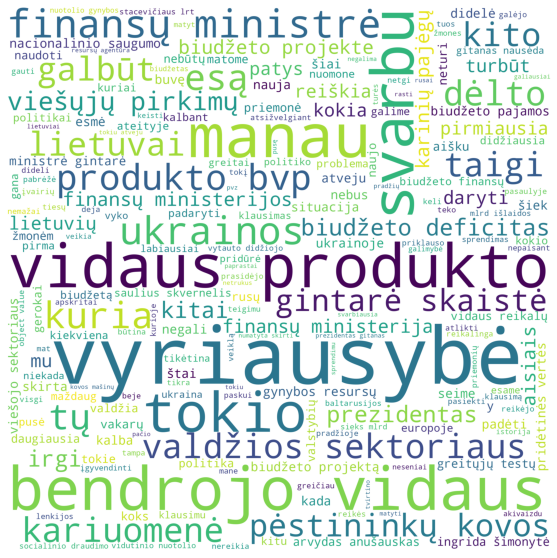

cyber security related words:


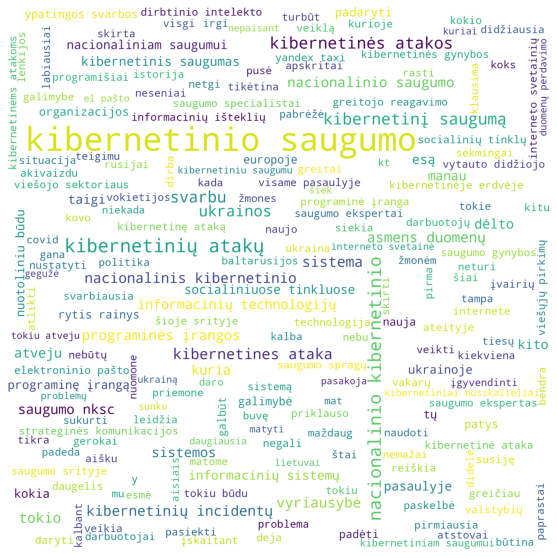

citizenship related words:


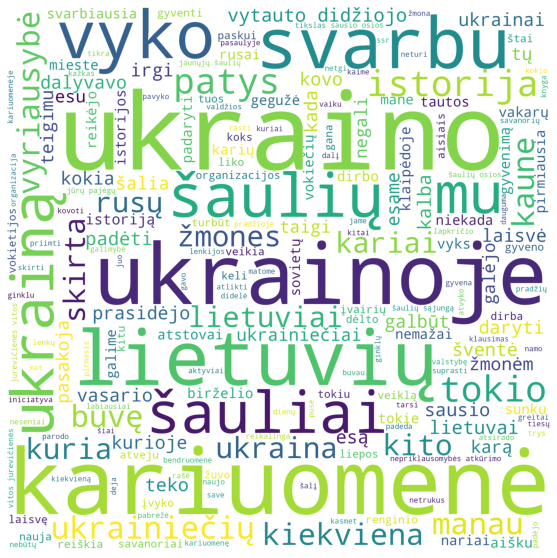

incidents related words:


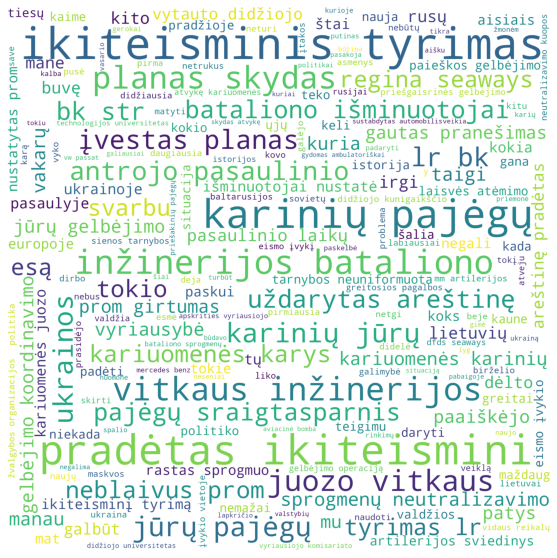

contribution related words:


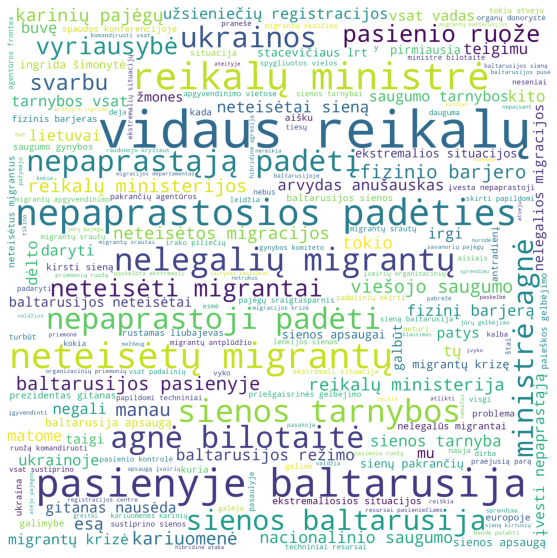

In [40]:
# nlp = spacy.load("lt_core_news_md")
# stop_words = STOP_WORDS

# Adding categories into separate dataframes
politics = full_df_copy[full_df_copy["keyword_id"] == 337490]
politics = politics["article_body"]

training = full_df_copy[full_df_copy["keyword_id"] == 337488]
training = training["article_body"]

budget = full_df_copy[full_df_copy["keyword_id"] == 337489]
budget = budget["article_body"]

cyber_security = full_df_copy[full_df_copy["keyword_id"] == 337491]
cyber_security = cyber_security["article_body"]

citizenship = full_df_copy[full_df_copy["keyword_id"] == 337492]
citizenship = citizenship["article_body"]

incidents = full_df_copy[full_df_copy["keyword_id"] == 337493]
incidents = incidents["article_body"]

contribution = full_df_copy[full_df_copy["keyword_id"] == 484549]
contribution = contribution["article_body"]

#Iterating through each new dataframe and creating wordcloud from it and excluding custom stopwords
def wordcloud_draw(dataset,file_name):
    words = " ".join(dataset)
    cleaned_word = " ".join([word for word in words.split() if word not in stopwords])
    wordcloud = WordCloud(
        stopwords=stopwords, background_color="white", width=2500, height=2500
    ).generate(cleaned_word)
    plt.figure(1, figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    # plt.figure(figsize=(15,10), facecolor=(.99, .99, .99))
    plt.savefig('Wordcloud_'+file_name+'.png')
    plt.show()


# print(stop_words)


print("politics related words:")
wordcloud_draw(politics, 'politics')

print("training related words:")
wordcloud_draw(training, 'training')

print("budget related words:")
wordcloud_draw(budget, 'budget')

print("cyber security related words:")
wordcloud_draw(cyber_security,'cyber_security')

print("citizenship related words:")
wordcloud_draw(citizenship,'citizenship')

print("incidents related words:")
wordcloud_draw(incidents,'incidents')

print("contribution related words:")
wordcloud_draw(contribution,'contribution')

In [41]:
full_df_copy["article_body"][1]

'lietuvoje su oficialiu vizitu lankėsi kroatijos respublikos kariuomenės vadas admirolas robert hranj  kuris susitikime su lietuvos kariuomenės vadu gen  ltn  valdemaru rupšiu aptarė dvišalį karinį bendradarbiavimą  bendrą dalyvavimą tarptautinėse pratybose bei planus dėl tolimesnės paramos ukrainai     su kroatijos ginkluotosiomis pajėgomis keičiamės patirtimi ir žiniomis skirtingų dimensijų  žemės ir oro pajėgumų vystyme  įsigyjamos technikos eksploatacijoje  tai tęsti planuojame ir ateityje     sakė lietuvos kariuomenės vadas  kroatijos respublikos kariuomenės vadas vizito metu susitiko su lietuvoje dislokuotos nato priešakinių pajėgų bataliono kovinės grupės vadu plk  ltn  lars neitzel  kroatijos kontingento lietuvoje vadu  taip pat susitiko su kovinėje grupėje tarnaujančiais kroatijos kariais  apžiūrėjo sąjungininkų ginkluotę  tai trečioji kroatijos pėstininkų kuopos rotacija nato priešakinių pajėgų kovinėje grupėje nuo jos įsteigimo lietuvoje 2017 metais  jai vadovauja ir didžiau

In [42]:
def remove_stopwords(text):
    words = word_tokenize(text)
    return [x for x in words if x not in stopwords]


full_df_copy["article_body"] = full_df_copy["article_body"].apply(remove_stopwords)
full_df_copy["article_body"][1]

['oficialiu',
 'vizitu',
 'lankėsi',
 'kroatijos',
 'respublikos',
 'kariuomenės',
 'vadas',
 'admirolas',
 'robert',
 'hranj',
 'susitikime',
 'kariuomenės',
 'vadu',
 'gen',
 'ltn',
 'valdemaru',
 'rupšiu',
 'aptarė',
 'dvišalį',
 'karinį',
 'bendradarbiavimą',
 'bendrą',
 'dalyvavimą',
 'tarptautinėse',
 'pratybose',
 'planus',
 'tolimesnės',
 'ukrainai',
 'kroatijos',
 'ginkluotosiomis',
 'pajėgomis',
 'keičiamės',
 'patirtimi',
 'žiniomis',
 'skirtingų',
 'dimensijų',
 'pajėgumų',
 'vystyme',
 'įsigyjamos',
 'technikos',
 'eksploatacijoje',
 'tęsti',
 'planuojame',
 'ateityje',
 'kariuomenės',
 'vadas',
 'kroatijos',
 'respublikos',
 'kariuomenės',
 'vadas',
 'vizito',
 'susitiko',
 'dislokuotos',
 'priešakinių',
 'pajėgų',
 'bataliono',
 'kovinės',
 'vadu',
 'plk',
 'ltn',
 'lars',
 'neitzel',
 'kroatijos',
 'kontingento',
 'vadu',
 'susitiko',
 'kovinėje',
 'grupėje',
 'tarnaujančiais',
 'kroatijos',
 'kariais',
 'apžiūrėjo',
 'sąjungininkų',
 'ginkluotę',
 'trečioji',
 'kroatij

In [43]:
# Reindex rows and add it to different dataframe
full_df_cleaned = full_df_copy.reset_index(drop=True)

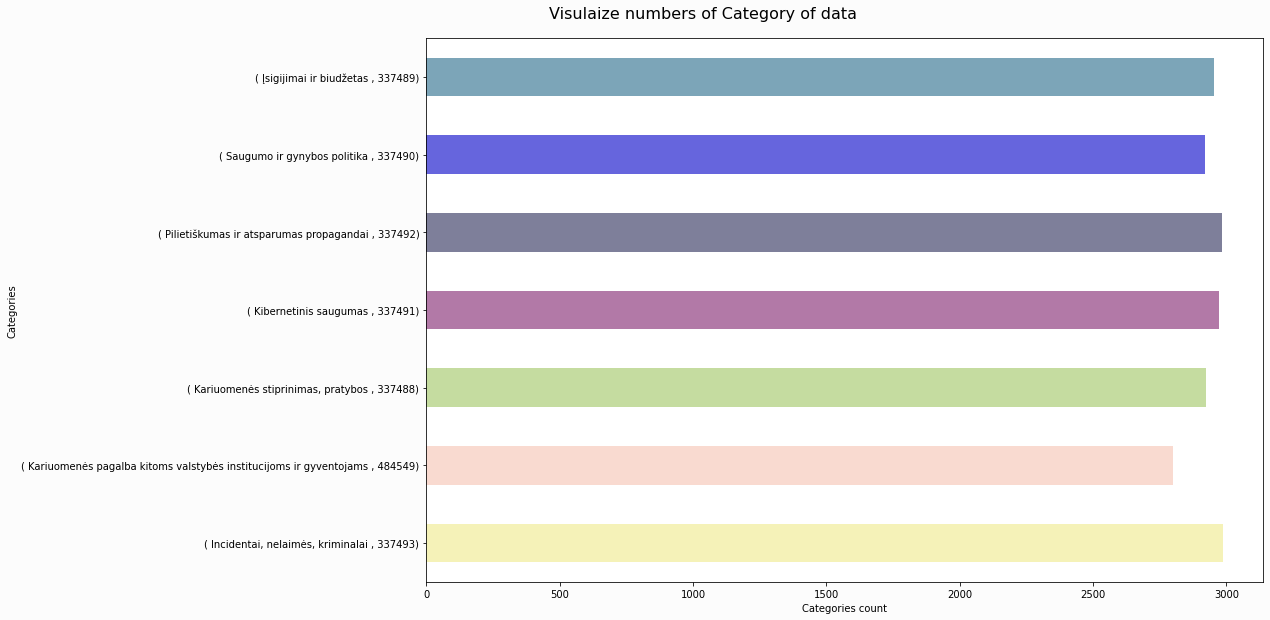

In [44]:
plt.figure(figsize=(15,10), facecolor=(.99, .99, .99))
full_df_cleaned.groupby("keyword_name").keyword_id.value_counts().plot(kind="barh", color=colors)
plt.xlabel("Categories count")
plt.ylabel("Categories")
plt.title("Visulaize numbers of Category of data", pad=20, fontsize=16).set_position([.33, 1])
plt.savefig('Cleaned_data.png', facecolor=(.99, .99, .99))
plt.show()

## Lemitizing text with spaCy

In [45]:
!python3 -m spacy download lt_core_news_md

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-27 12:41:48.420793: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 12:41:48.420931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 12:41:48.420956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [46]:
nlp = spacy.load("lt_core_news_md")

# Lematizing each article_body. Takes up to 30min
def lemmatize_text(text):
    full_text = " ".join(text)
    doc = nlp(full_text)
    return [token.lemma_ for token in doc if not token.is_punct]


full_df_cleaned["article_body"] = full_df_cleaned["article_body"].apply(lemmatize_text)

In [47]:
def back_to_string(text):
    full_text = " ".join(text)
    return full_text


full_df_cleaned["article_body"] = full_df_cleaned["article_body"].apply(back_to_string)

### Defining data for training

In [48]:
# Define target and features
X = full_df_cleaned["article_body"]

y = full_df_cleaned["keyword_id"]


# tTrain test split (66% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=123
)


print("Training Data :", X_train.shape)

print("Testing Data : ", X_test.shape)

Training Data : (13763,)
Testing Data :  (6780,)


## Count Vectorizer

In [49]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(13763, 199152)

<h3>Logistic Regression</h3>

In [50]:
lr = LogisticRegression(max_iter=100)

lr.fit(X_train_cv, y_train)


# transform X_test using CV

X_test_cv = cv.transform(X_test)


# generate predictions

lr_predictions = lr.predict(X_test_cv)

lr_predictions

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([337490, 337492, 337489, ..., 484549, 337492, 484549])

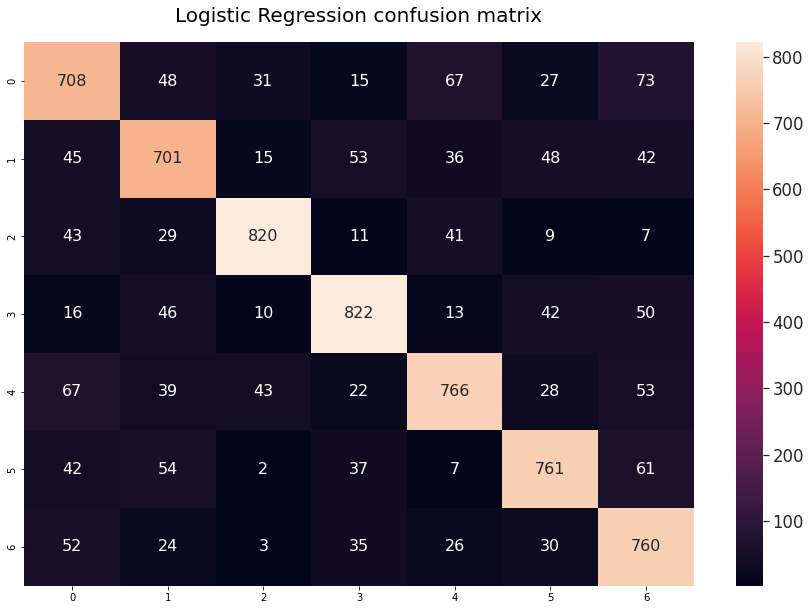

In [51]:
lr_df = pd.DataFrame(metrics.confusion_matrix(y_test, lr_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(lr_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("Logistic Regression confusion matrix", pad=20, fontsize=20)
plt.savefig('lr_prediction_heatmap_cv.png')
plt.show()

In [52]:
# calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)

# calculate precision
lr_precision = precision_score(y_test, lr_predictions, average="weighted")

# calculate recall
lr_recall = recall_score(y_test, lr_predictions, average="weighted")

# calculate F1 score
lr_f1 = f1_score(y_test, lr_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(lr_accuracy * 100))
print("Precision: {:.2f}%".format(lr_precision * 100))
print("Recall: {:.2f}%".format(lr_recall * 100))
print("F1 score: {:.2f}%".format(lr_f1 * 100))

# print Logistic Regression classification report
target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, lr_predictions, target_names=target_names))

Accuracy: 78.73%
Precision: 78.91%
Recall: 78.73%
F1 score: 78.77%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.73      0.73      0.73       969
                                           Įsigijimai ir biudžetas        0.74      0.75      0.75       940
                                       Saugumo ir gynybos politika        0.89      0.85      0.87       960
                                             Kibernetinis saugumas        0.83      0.82      0.82       999
                           Pilietiškumas ir atsparumas propagandai        0.80      0.75      0.78      1018
                                  Incidentai, nelaimės, kriminalai        0.81      0.79      0.80       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.73      0.82      0.77       930

                                                           

<h3>Random Forest Classifier</h3>

In [53]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)

rf.fit(X_train_cv, y_train)


# transform X_test using CV

X_test_cv = cv.transform(X_test)


# generate predictions

rf_predictions = rf.predict(X_test_cv)

rf_predictions

array([337490, 337492, 337489, ..., 484549, 337492, 484549])

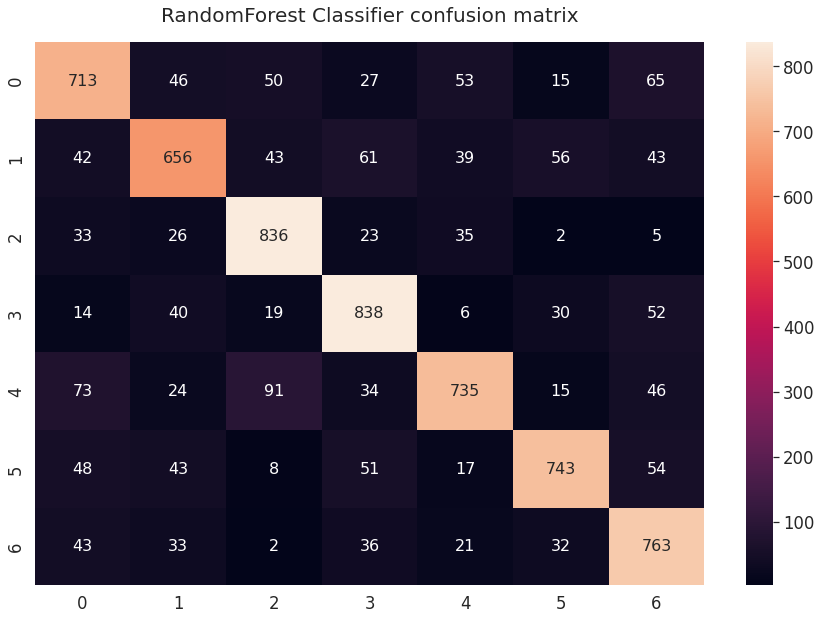

In [54]:
rf_df = pd.DataFrame(metrics.confusion_matrix(y_test, rf_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(rf_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("RandomForest Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig('rdfprediction_heatmap_cv.png')
plt.show()

In [55]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# calculate precision
precision = precision_score(y_test, rf_predictions, average="weighted")

# calculate recall
recall = recall_score(y_test, rf_predictions, average="weighted")

# calculate F1 score
f1 = f1_score(y_test, rf_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

# print Random Forest classification report
target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, rf_predictions, target_names=target_names))

Accuracy: 77.94%
Precision: 78.04%
Recall: 77.94%
F1 score: 77.85%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.74      0.74      0.74       969
                                           Įsigijimai ir biudžetas        0.76      0.70      0.73       940
                                       Saugumo ir gynybos politika        0.80      0.87      0.83       960
                                             Kibernetinis saugumas        0.78      0.84      0.81       999
                           Pilietiškumas ir atsparumas propagandai        0.81      0.72      0.76      1018
                                  Incidentai, nelaimės, kriminalai        0.83      0.77      0.80       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.74      0.82      0.78       930

                                                           

<h3>Decision Tree Classifier</h3>

In [56]:
dt = DecisionTreeClassifier()

dt.fit(X_train_cv, y_train)


# transform X_test using CV

X_test_cv = cv.transform(X_test)


# generate predictions

dt_predictions = dt.predict(X_test_cv)

dt_predictions

array([337490, 337492, 337489, ..., 484549, 337490, 484549])

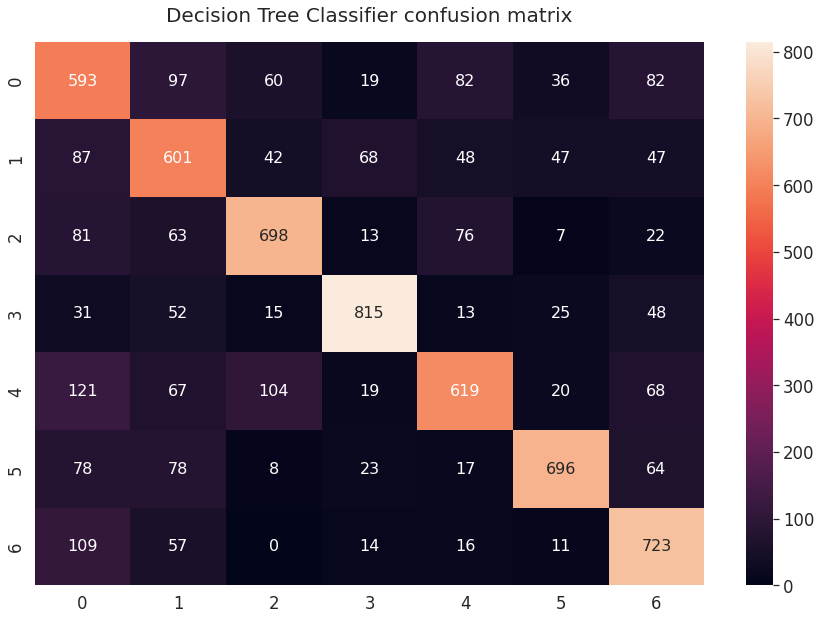

In [57]:
dt_df = pd.DataFrame(metrics.confusion_matrix(y_test, dt_predictions))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(dt_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("Decision Tree Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig('dt_prediction_heatmap_cv.png')
plt.show()

In [58]:
# calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# calculate precision
dt_precision = precision_score(y_test, dt_predictions, average="weighted")

# calculate recall
dt_recall = recall_score(y_test, dt_predictions, average="weighted")

# calculate F1 score
dt_f1 = f1_score(y_test, dt_predictions, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Precision: {:.2f}%".format(dt_precision * 100))
print("Recall: {:.2f}%".format(dt_recall * 100))
print("F1 score: {:.2f}%".format(dt_f1 * 100))

# print Decision Tree classification report
target_names = [
    category['keyword_name'].iloc[0],
    category['keyword_name'].iloc[1],
    category['keyword_name'].iloc[2],
    category['keyword_name'].iloc[3],
    category['keyword_name'].iloc[4],
    category['keyword_name'].iloc[5],
    category['keyword_name'].iloc[6],
]
print(classification_report(y_test, dt_predictions, target_names=target_names))

Accuracy: 69.99%
Precision: 70.78%
Recall: 69.99%
F1 score: 70.18%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.54      0.61      0.57       969
                                           Įsigijimai ir biudžetas        0.59      0.64      0.61       940
                                       Saugumo ir gynybos politika        0.75      0.73      0.74       960
                                             Kibernetinis saugumas        0.84      0.82      0.83       999
                           Pilietiškumas ir atsparumas propagandai        0.71      0.61      0.66      1018
                                  Incidentai, nelaimės, kriminalai        0.83      0.72      0.77       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.69      0.78      0.73       930

                                                           

## TF-IDF approach

In [59]:
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf.shape

(13763, 199152)

<h3>Logistic Regression</h3>

In [60]:
lr_tfidf = LogisticRegression(max_iter=100)

lr_tfidf.fit(X_train_tfidf, y_train)


# transform X_test using tfidf

X_test_tfidf = tfidf.transform(X_test)


# generate predictions

lr_predictions_tfidf = lr_tfidf.predict(X_test_tfidf)

lr_predictions_tfidf

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([337490, 337492, 337489, ..., 484549, 337492, 484549])

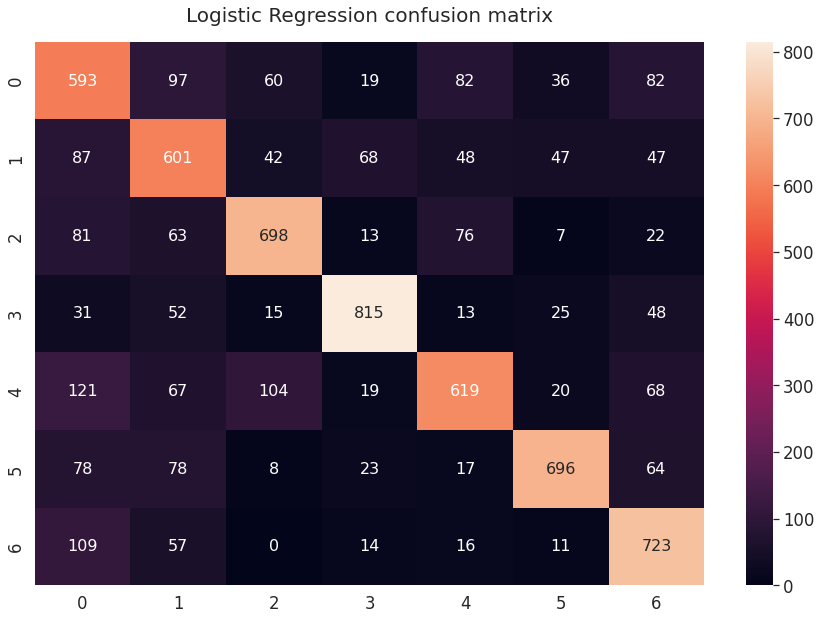

In [61]:
lr_tfidf_df = pd.DataFrame(metrics.confusion_matrix(y_test, lr_predictions_tfidf))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(dt_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("Logistic Regression confusion matrix", pad=20, fontsize=20)
plt.savefig('lr_prediction_heatmap_tfidf.png')
plt.show()

In [62]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# calculate accuracy
lr_tfidf_accuracy = accuracy_score(y_test, lr_predictions_tfidf)

# calculate precision
lr_tfidf_precision = precision_score(y_test, lr_predictions_tfidf, average="weighted")

# calculate recall
lr_tfidf_recall = recall_score(y_test, lr_predictions_tfidf, average="weighted")

# calculate F1 score
lr_tfidf_f1 = f1_score(y_test, lr_predictions_tfidf, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(lr_tfidf_accuracy * 100))
print("Precision: {:.2f}%".format(lr_tfidf_precision * 100))
print("Recall: {:.2f}%".format(lr_tfidf_recall * 100))
print("F1 score: {:.2f}%".format(lr_tfidf_f1 * 100))

target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, lr_predictions_tfidf, target_names=target_names))

Accuracy: 80.68%
Precision: 80.95%
Recall: 80.68%
F1 score: 80.72%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.80      0.74      0.77       969
                                           Įsigijimai ir biudžetas        0.73      0.77      0.75       940
                                       Saugumo ir gynybos politika        0.83      0.87      0.84       960
                                             Kibernetinis saugumas        0.87      0.86      0.86       999
                           Pilietiškumas ir atsparumas propagandai        0.74      0.83      0.78      1018
                                  Incidentai, nelaimės, kriminalai        0.89      0.80      0.84       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.81      0.79      0.80       930

                                                           

<h3>Random Forest Classifier</h3>

In [63]:
rf_tfidf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)

rf_tfidf.fit(X_train_tfidf, y_train)


# transform X_test using tfidf

X_test_tfidf = tfidf.transform(X_test)


# generate predictions

rf_predictions_tfidf = rf_tfidf.predict(X_test_tfidf)

rf_predictions_tfidf

array([337490, 337492, 337489, ..., 484549, 337492, 484549])

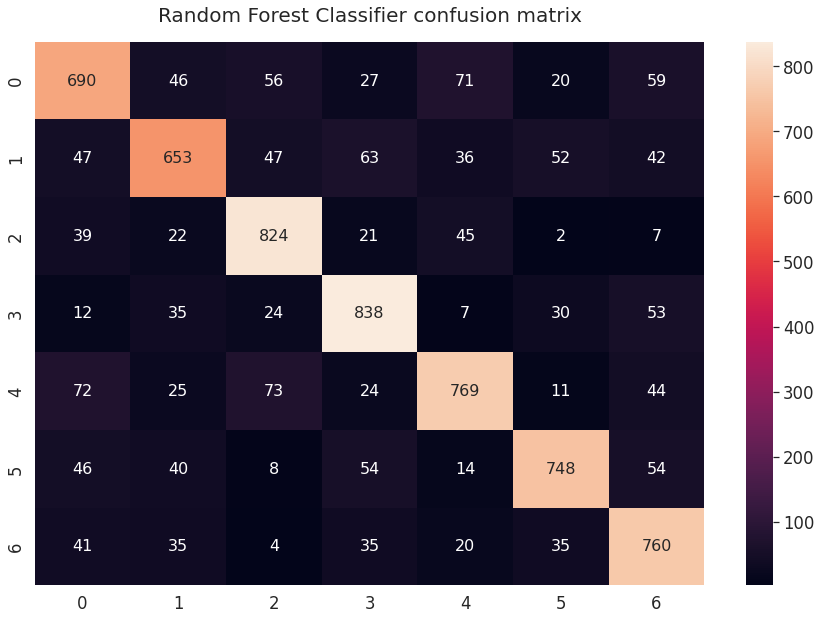

In [64]:
rd_tfidf_df = pd.DataFrame(metrics.confusion_matrix(y_test, rf_predictions_tfidf))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(rd_tfidf_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("Random Forest Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig('rdfprediction_heatmap_tfidf.png')
plt.show()

In [65]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# calculate accuracy
rd_tfidf_accuracy = accuracy_score(y_test, rf_predictions_tfidf)

# calculate precision
rd_tfidf_precision = precision_score(y_test, rf_predictions_tfidf, average="weighted")

# calculate recall
rd_tfidf_recall = recall_score(y_test, rf_predictions_tfidf, average="weighted")

# calculate F1 score
rd_tfidf_f1 = f1_score(y_test, rf_predictions_tfidf, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(rd_tfidf_accuracy * 100))
print("Precision: {:.2f}%".format(rd_tfidf_precision * 100))
print("Recall: {:.2f}%".format(rd_tfidf_recall * 100))
print("F1 score: {:.2f}%".format(rd_tfidf_f1 * 100))

target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, rf_predictions_tfidf, target_names=target_names))

Accuracy: 77.91%
Precision: 77.95%
Recall: 77.91%
F1 score: 77.83%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.73      0.71      0.72       969
                                           Įsigijimai ir biudžetas        0.76      0.69      0.73       940
                                       Saugumo ir gynybos politika        0.80      0.86      0.83       960
                                             Kibernetinis saugumas        0.79      0.84      0.81       999
                           Pilietiškumas ir atsparumas propagandai        0.80      0.76      0.78      1018
                                  Incidentai, nelaimės, kriminalai        0.83      0.78      0.80       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.75      0.82      0.78       930

                                                           

In [73]:
# Convert the X_test array to a pandas DataFrame
X_test_df = pd.DataFrame({"article_body": X_test})

# Add the predicted and actual y values to the DataFrame
X_test_df["predicted_keyword_id"] = rf_predictions_tfidf
X_test_df["actual_keyword_id"] = y_test.values

X_test_df

,article_body,predicted_keyword_id,actual_keyword_id
6338,pirmadienis prezidentūra sušaukti gynimas vgt prezidentas gitanas nausėda vyriausias patarėjas kęstutis budryti šalis adaptuotis regionas tvyrančių grėsmė tobulinyti karinis aljansas planas atlikti nacionalinis kolektyvinis gynyba vgt pavedė ministeri...,337490,337490
12419,genocidas rezistencija lggrtc patvirtinti leipalingis atrasti partizanas juozo vitkus kazimieraitis palaikai pirmadienis pranešė lggrtc generalinis arūnas bubnys norėti pasidalinti džiugia svarbias žinia leipalingis surasti palaikas žymus pietas parti...,337492,337492
4497,premjera saulius skvernelis sulaukti opozicija klausimas finansinis nusikaltimas tyrimas tarnyba fntt atliekamą tyrimas greitųjų koronavirusas testas pirkimas sprendimas atlikti griežtai laikytis įstatymas ruožtas pirmininkas pažymėti manantis istorij...,337489,337489
17482,avarija alytus varėna gatvė įvykti trečiadienis vw golf vairuotojas nepastebėjęs pagrindinis kelias važiuoti audi a6 rėžėsi automobilį netrukus įvykis atskubėti greitosios medicina pagalba medikas vw golf vairuotojas nesužeisti audi a6 vairuotoja sunk...,337493,337493
4886,2018 gruodis pranešimas žiniasklaida lsdd frakcija pranešimas priimkėti biudžetas sėskimas derybas stalas realiai patenkinti reikalavimas artimi ateitis socialdemokratas lsdd frakcija raginti naris susitarti priimti biudžetas projektas lygiagrečiai sė...,337489,337489
...,...,...,...
372,nuolatinis privalomąją pradinis tarnyba trukti mėnesius kasmet pašaukiama 000 000 prievolininkas pora šimtas aukštas mokykla studentas absolventas atlikti jaunesniųjų karininkas vadas mokymas vž apžvelgti kokiose šalis privalomoji tarnyba ilg kokiose ...,337488,337488
12159,sakyti naujas naujas laimė prabėgti trisdešimt esame laisvi nepriklausyti dažnai tekti išgirsti klausimas toks kovojėto neabejotinai pažengti pandemija didėti susiskaldymas įvairus klausimas pasitikėjimas valdžia žiniasklaida mažėti lietuvis mielai em...,337490,337492
19981,pateikti svarbus antradienis užsienis apžvalga migrantas krizė praėjusią para sulaikyti 185 migrantas neteisėtai kirtę baltarusija siena nelegalis patekti 4026 užsienietis siena tarnyba vadas rustamas liubajevas vidurnaktis neįleisti 180 neteisėtas mi...,484549,484549
14512,minint nepriklausomybė atkūrimas kovas ąją. sportininkas muziejus daukantas vykti turėti negalią šachmata šaškė turnyras turėti negalią šachmata šaškė turnyras paulius matulevičius paulius matulevičius paulius matulevičius paulius matulevičius paulius...,337492,337492


In [75]:
missed_df = X_test_df[X_test_df["predicted_keyword_id"]!=X_test_df["actual_keyword_id"] ]

In [76]:
missed_df.to_csv('missed_predictions.csv', index=False)

<h3>Decision Tree Classifier</h3>

In [66]:
dt_tfidf = DecisionTreeClassifier()

dt_tfidf.fit(X_train_tfidf, y_train)


# transform X_test using CV

X_test_tfidf = tfidf.transform(X_test)


# generate predictions

dt_predictions_tfidf = dt_tfidf.predict(X_test_tfidf)

dt_predictions_tfidf

array([337490, 337492, 337493, ..., 484549, 337492, 484549])

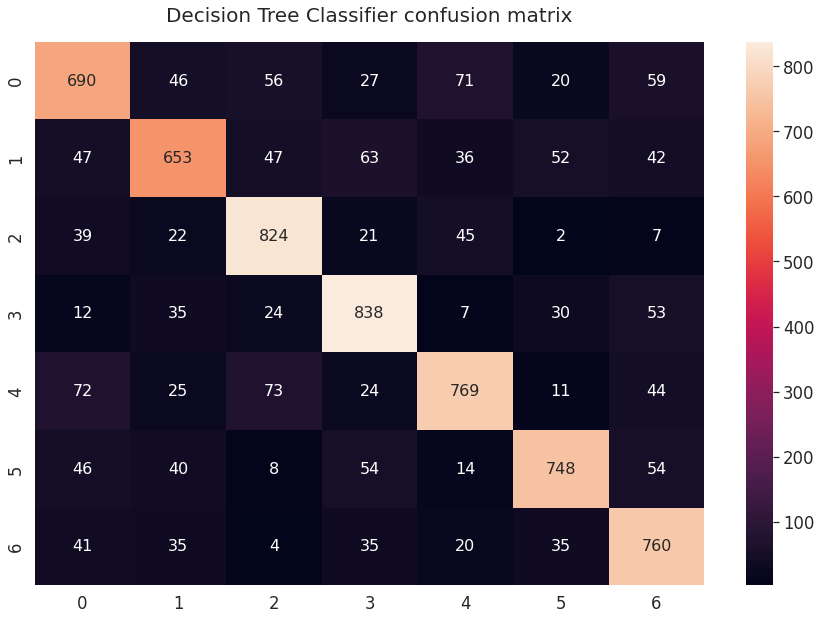

In [67]:
dt_tfidf_df = pd.DataFrame(metrics.confusion_matrix(y_test, rf_predictions_tfidf))
fig, ax = plt.subplots(figsize=(15, 10))

sn.set(font_scale=1.5)
sn.heatmap(dt_tfidf_df, annot=True, annot_kws={"size": 16}, fmt='d', ax=ax)
plt.title("Decision Tree Classifier confusion matrix", pad=20, fontsize=20)
plt.savefig('dt_prediction_heatmap_tfidf.png')
plt.show()

In [68]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# calculate accuracy
dt_tfidf_accuracy = accuracy_score(y_test, dt_predictions_tfidf)

# calculate precision
dt_tfidf_precision = precision_score(y_test, dt_predictions_tfidf, average="weighted")

# calculate recall
dt_tfidf_recall = recall_score(y_test, dt_predictions_tfidf, average="weighted")

# calculate F1 score
dt_tfidf_f1 = f1_score(y_test, dt_predictions_tfidf, average="weighted")

# print the results
print("Accuracy: {:.2f}%".format(dt_tfidf_accuracy * 100))
print("Precision: {:.2f}%".format(dt_tfidf_precision * 100))
print("Recall: {:.2f}%".format(dt_tfidf_recall * 100))
print("F1 score: {:.2f}%".format(dt_tfidf_f1 * 100))

target_names = [
    category["keyword_name"].iloc[0],
    category["keyword_name"].iloc[1],
    category["keyword_name"].iloc[2],
    category["keyword_name"].iloc[3],
    category["keyword_name"].iloc[4],
    category["keyword_name"].iloc[5],
    category["keyword_name"].iloc[6],
]
print(classification_report(y_test, dt_predictions_tfidf, target_names=target_names))

Accuracy: 69.48%
Precision: 70.13%
Recall: 69.48%
F1 score: 69.64%
                                                                     precision    recall  f1-score   support

                                 Kariuomenės stiprinimas, pratybos        0.56      0.63      0.59       969
                                           Įsigijimai ir biudžetas        0.59      0.64      0.62       940
                                       Saugumo ir gynybos politika        0.77      0.71      0.74       960
                                             Kibernetinis saugumas        0.81      0.80      0.81       999
                           Pilietiškumas ir atsparumas propagandai        0.69      0.61      0.65      1018
                                  Incidentai, nelaimės, kriminalai        0.80      0.71      0.75       964
 Kariuomenės pagalba kitoms valstybės institucijoms ir gyventojams        0.68      0.77      0.72       930

                                                           

## Saving the best model to pickle

In [69]:
import pickle

In [70]:
# with open('tfidf_vectorizer.pkl', 'wb') as file:
#     pickle.dump(tfidf, file)

In [71]:
# with open('lr_tfidf_model.pkl', 'wb') as file:
#     pickle.dump(lr_tfidf, file)

## Test on prediction data


In [72]:
sample_df = pd.read_csv("KAM_tema_predict_2.csv", index_col=0, encoding='utf-8')

FileNotFoundError: ignored

In [ ]:
sample_df["article_title"] = sample_df["article_title"].str.lower()
sample_df["article_body"] = sample_df["article_body"].str.lower()

In [ ]:
sample_df["article_body"] = sample_df["article_body"].apply(lambda x: remove_html_tags(x))

In [ ]:
sample_df["article_body"] = sample_df["article_body"].apply(special_char)

In [ ]:
sample_df["title_lang"] = sample_df["article_title"].apply(detect_lang)
sample_df["body_lang"] = sample_df["article_body"].str.slice(stop=255).apply(detect_lang)

In [ ]:
clean_dataframe(sample_df)
sample_df.drop(["title_lang", "body_lang"], axis=1, inplace=True)

In [ ]:
sample_df["article_body"] = sample_df["article_body"].apply(remove_stopwords)

In [ ]:
sample_df_cleaned=sample_df

In [ ]:
sample_df_cleaned

In [ ]:
sample_df_cleaned["article_body"] = sample_df_cleaned["article_body"].apply(lemmatize_text)

In [ ]:
sample_df_cleaned["article_body"] = sample_df_cleaned["article_body"].apply(back_to_string)

In [ ]:
sample_df_cleaned["article_body"].iloc[1]

In [ ]:
freestyle_tfidf = tfidf.transform([sample_df_cleaned["article_body"].iloc[1]])

In [ ]:
freestyle_tfidf

In [ ]:
freestylepredict = lr_tfidf.predict(freestyle_tfidf)

In [ ]:
prediction_df = pd.DataFrame(freestylepredict)

In [ ]:
prediction_df